In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [3]:
acer_models = df[df['Company'].str.startswith('Acer')]
print(acer_models)

     Company                               Product            TypeName  \
5       Acer                              Aspire 3            Notebook   
9       Acer                               Swift 3           Ultrabook   
36      Acer                              Aspire 3            Notebook   
43      Acer                       Aspire A515-51G            Notebook   
51      Acer                       Aspire A515-51G            Notebook   
...      ...                                   ...                 ...   
1215    Acer      C740-C9QX (3205U/2GB/32GB/Chrome             Netbook   
1216    Acer                               E5 774G            Notebook   
1219    Acer  SP714-51 (i7-7Y75/8GB/256GB/FHD/W10)  2 in 1 Convertible   
1242    Acer                        Aspire ES1-572            Notebook   
1263    Acer                        Aspire ES1-531            Notebook   

      Inches  Ram          OS  Weight  Price_euros    Screen  ScreenW  ...  \
5       15.6    4  Windows 10    

In [4]:
df.shape

(1275, 23)

we will check for any null values

In [5]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

Since our dataset does not have any null values, it is going to save a lot of our time.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

we do not have any null values, but what if we will have duplicated values?


In [7]:
print(df.duplicated().sum())

0


great, we do not have any duplicated values too.

In [8]:
print("Numeric Summary:\n", df.describe())

Numeric Summary:
             Inches          Ram       Weight  Price_euros      ScreenW  \
count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
mean     15.022902     8.440784     2.040525  1134.969059  1900.043922   
std       1.429470     5.097809     0.669196   700.752504   493.346186   
min      10.100000     2.000000     0.690000   174.000000  1366.000000   
25%      14.000000     4.000000     1.500000   609.000000  1920.000000   
50%      15.600000     8.000000     2.040000   989.000000  1920.000000   
75%      15.600000     8.000000     2.310000  1496.500000  1920.000000   
max      18.400000    64.000000     4.700000  6099.000000  3840.000000   

           ScreenH     CPU_freq  PrimaryStorage  SecondaryStorage  
count  1275.000000  1275.000000     1275.000000       1275.000000  
mean   1073.904314     2.302980      444.517647        176.069020  
std     283.883940     0.503846      365.537726        415.960655  
min     768.000000     0.900000        8.00

In [9]:
print("Categorical Summary: \n", df.describe(include=object))

Categorical Summary: 
        Company Product  TypeName          OS   Screen Touchscreen IPSpanel  \
count     1275    1275      1275        1275     1275        1275     1275   
unique      19     618         6           9        4           2        2   
top       Dell  XPS 13  Notebook  Windows 10  Full HD          No       No   
freq       291      30       707        1048      835        1087      918   

       RetinaDisplay CPU_company      CPU_model PrimaryStorageType  \
count           1275        1275           1275               1275   
unique             2           3             93                  4   
top               No       Intel  Core i5 7200U                SSD   
freq            1258        1214            193                837   

       SecondaryStorageType GPU_company        GPU_model  
count                  1275        1275             1275  
unique                    4           4              110  
top                      No       Intel  HD Graphics 620  

Since we have both categorical and numerical data in our dataset, we will have to separate them before making our dataset ready for modeling.

In [10]:
cat_cols=df.select_dtypes(include="object").columns.tolist()
num_cols=df.select_dtypes(include=np.number).columns.tolist()

In [11]:
print(cat_cols)

['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']


In [12]:
print(num_cols)

['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']


We have to check how our price is actually distributed.

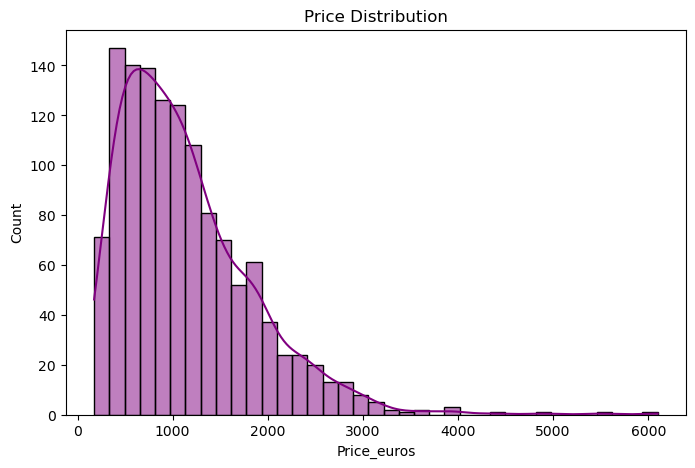

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price_euros'], kde=True, color='purple')
plt.title('Price Distribution')
plt.show()

So we can see that the target variable is right skewed.

In [14]:
print("\nPrice skewness:", df['Price_euros'].skew())



Price skewness: 1.511146749634856


Lets check for the correlation of numerical columns

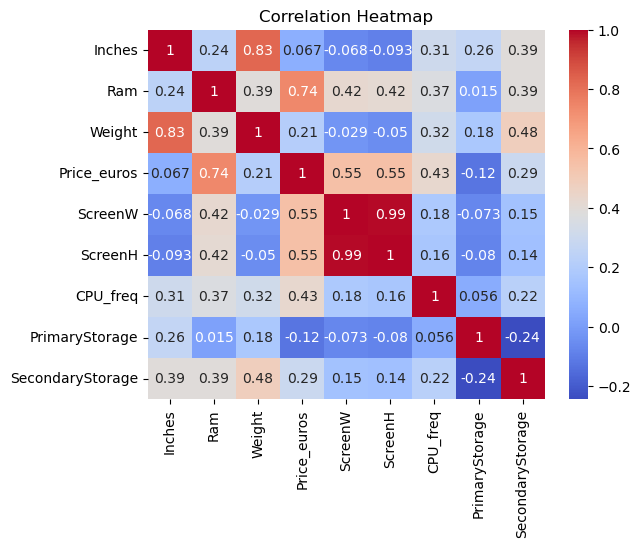

In [15]:
corr = df[num_cols].corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Top correlated features with price
corr_price = corr['Price_euros'].sort_values(ascending=False)
print("\nTop correlations with Price:")
print(corr_price.head(10))


Top correlations with Price:
Price_euros         1.000000
Ram                 0.740287
ScreenW             0.552491
ScreenH             0.548529
CPU_freq            0.428847
SecondaryStorage    0.291207
Weight              0.211883
Inches              0.066608
PrimaryStorage     -0.124775
Name: Price_euros, dtype: float64


Hmm, lets add some new features to the dataset

We will add two features, PPI and TotalStorage


In [17]:
if set(['ScreenW','ScreenH','Inches']).issubset(df.columns):
    df['PPI'] = ((df['ScreenW']**2 + df['ScreenH']**2)**0.5) / df['Inches']

This uses ScreenW, ScreenH and Inches, the higher the PPI the higher quality of the display will be.

In [18]:
if set(['PrimaryStorage','SecondaryStorage']).issubset(df.columns):
    df['TotalStorage'] = df['PrimaryStorage'] + df['SecondaryStorage']

It creates the total storage, the sum of primary and secondary storage, larger storage means higher price.

In [19]:
# Ensure no duplicates in column list
cols = ['Price_euros', 'PPI', 'TotalStorage'] + [c for c in num_cols if c not in ['Price_euros', 'PPI', 'TotalStorage']]

# Compute correlations
corr_matrix = df[cols].corr()

# Extract only the series of correlations with Price_euros
new_corr = corr_matrix['Price_euros'].sort_values(ascending=False)

print("\nUpdated correlations with Price:")
print(new_corr.head(10))


Updated correlations with Price:
Price_euros         1.000000
Ram                 0.740287
ScreenW             0.552491
ScreenH             0.548529
PPI                 0.470032
CPU_freq            0.428847
SecondaryStorage    0.291207
Weight              0.211883
TotalStorage        0.156661
Inches              0.066608
Name: Price_euros, dtype: float64


Now lets use boxplots for outliers

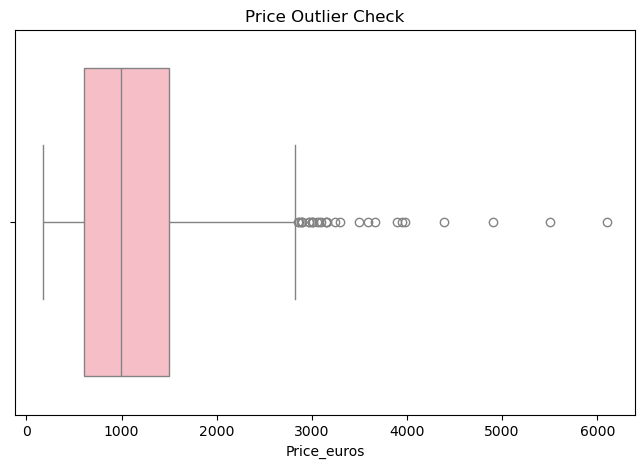

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price_euros'], color='lightpink')
plt.title("Price Outlier Check")
plt.show()

This tell us a lot about our data. The median of the prices is 1000 euros, and there are some outliers from 3000-6000 euros.

Lets handle these outliers now

In [21]:
df['Price_log'] = np.log1p(df['Price_euros'])

In [22]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


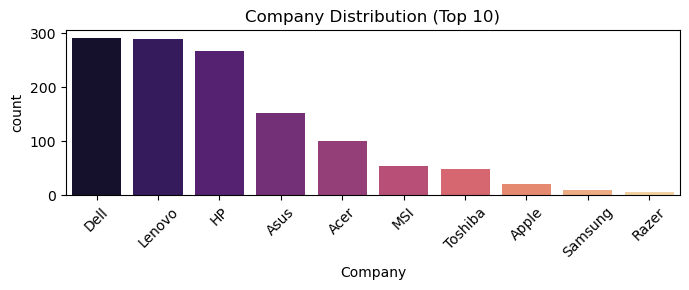

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


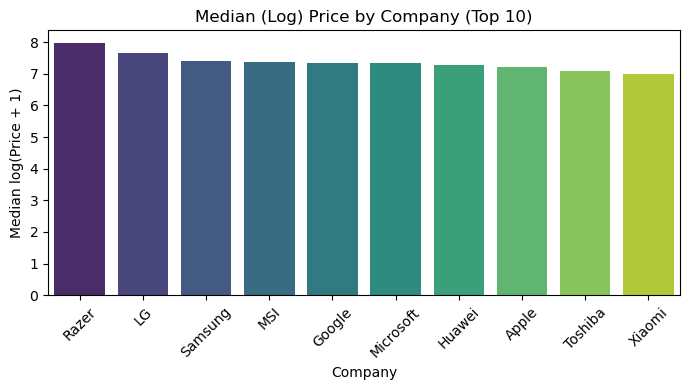

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


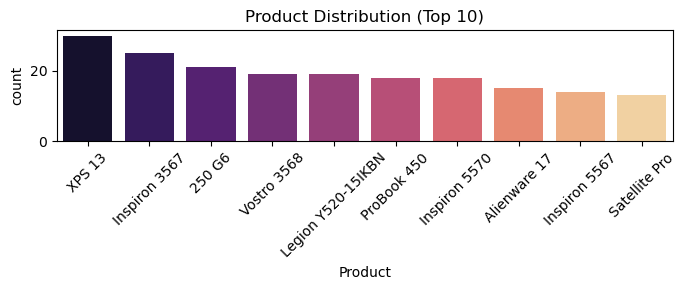

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


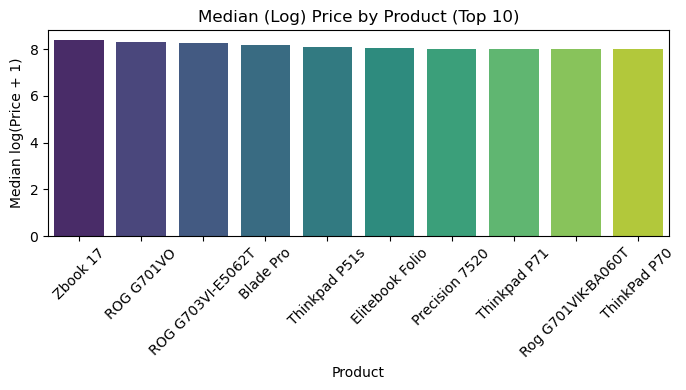

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


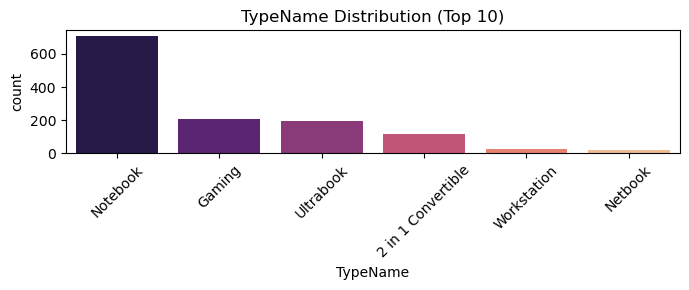

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


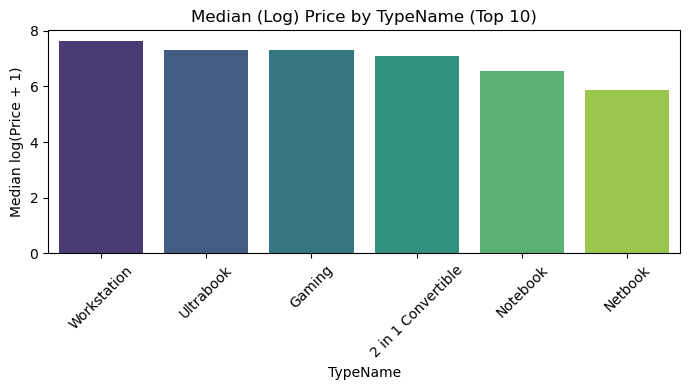

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


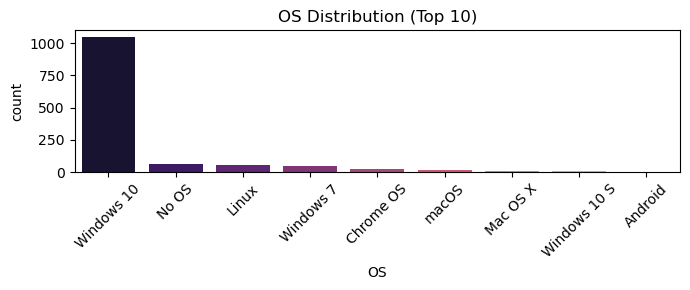

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


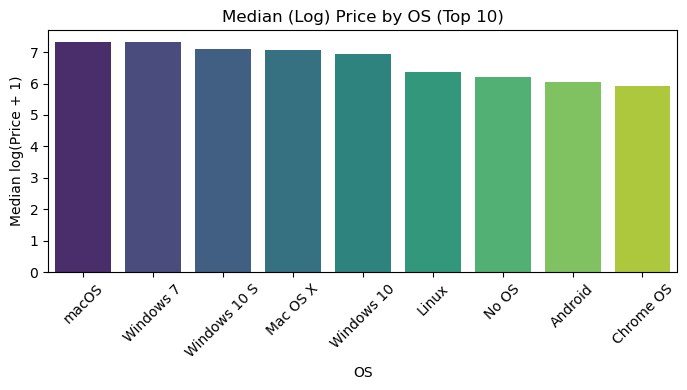

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


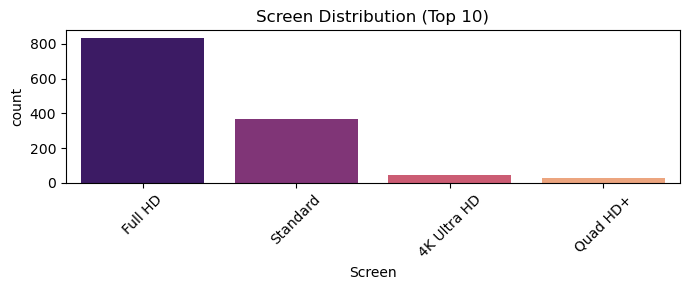

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


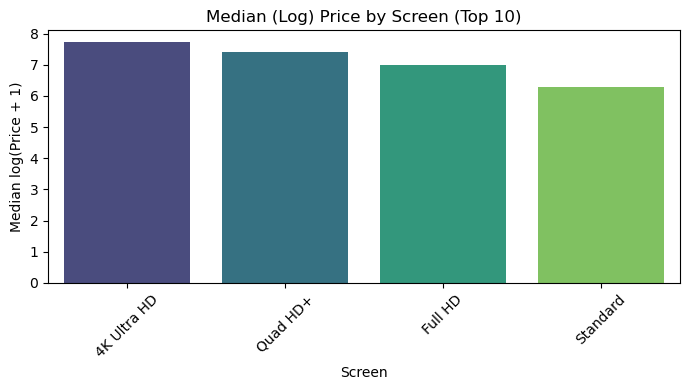

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


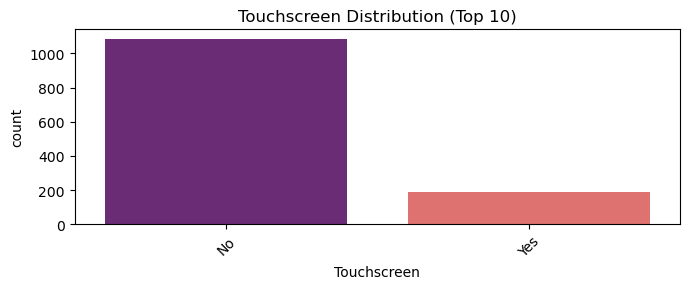

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


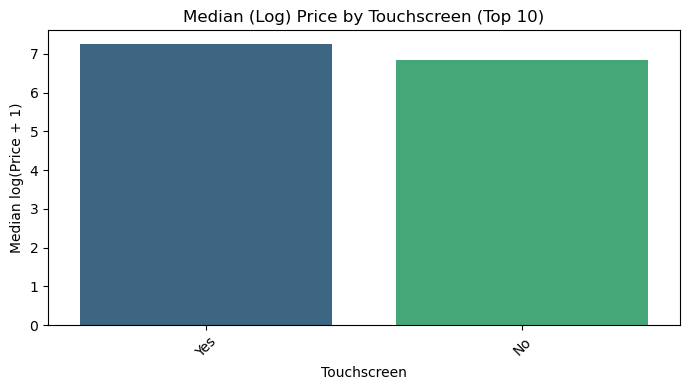

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


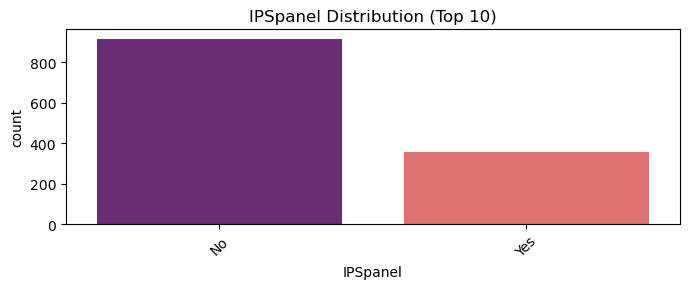

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


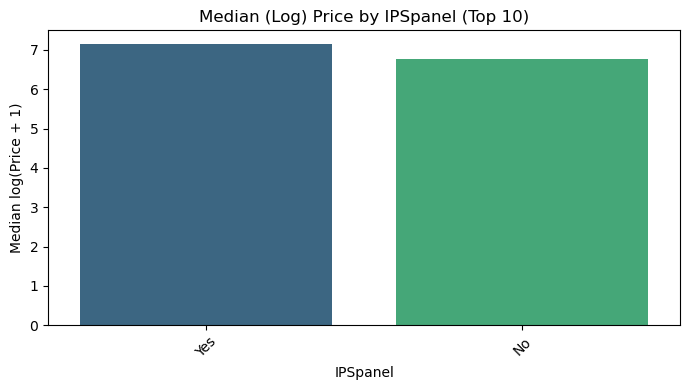

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


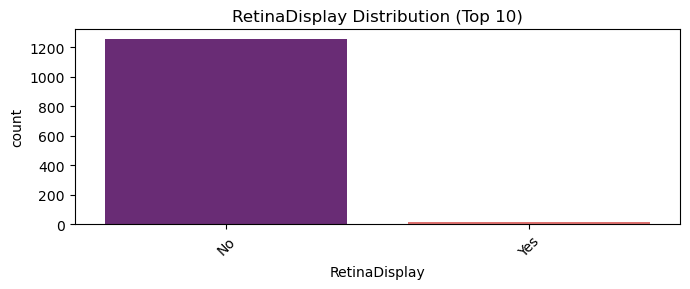

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


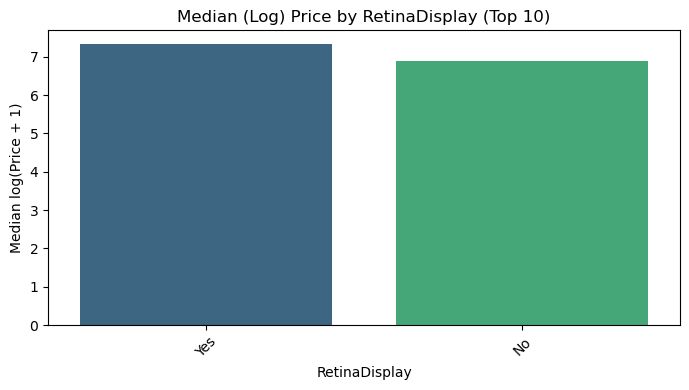

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


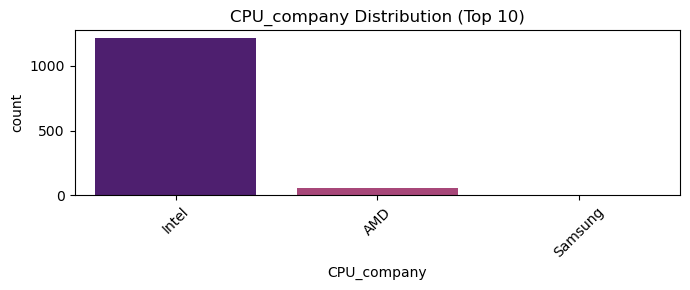

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


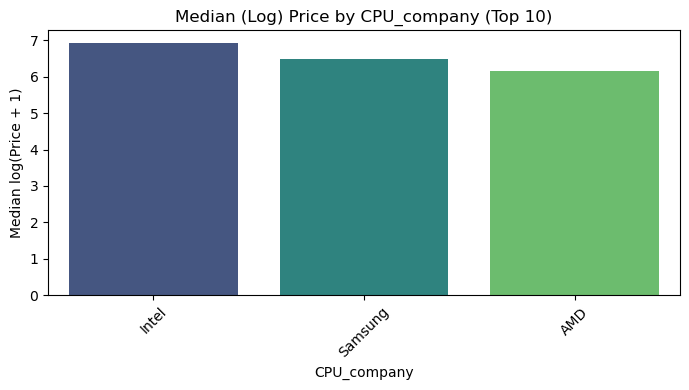

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


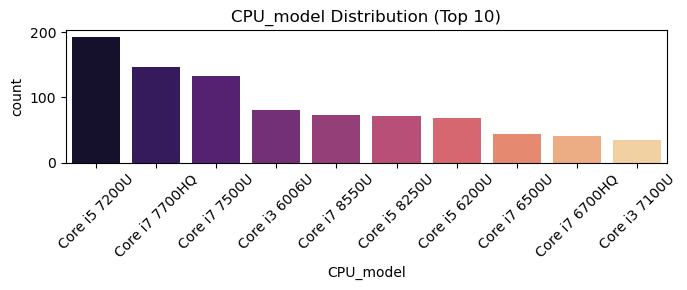

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


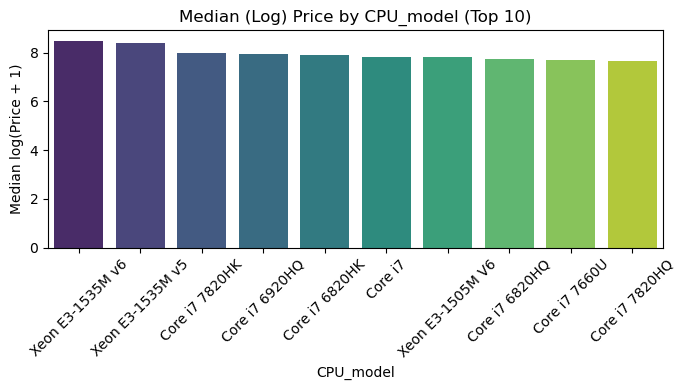

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


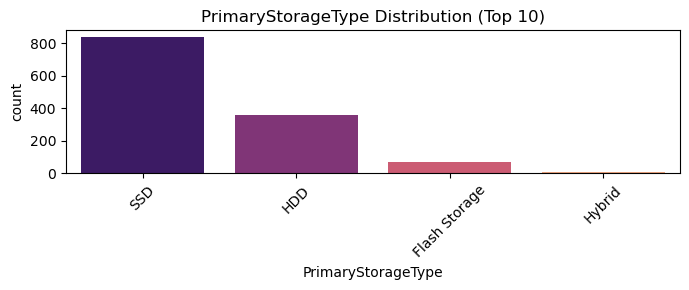

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


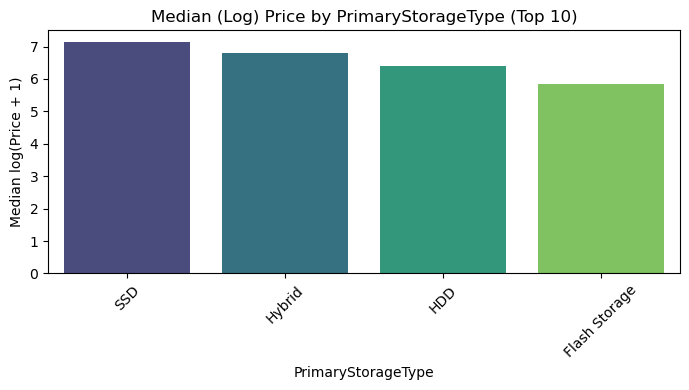

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


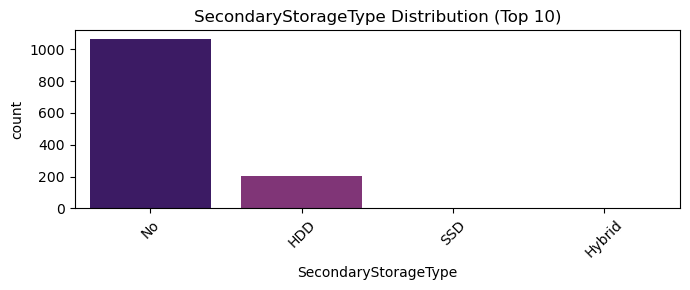

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


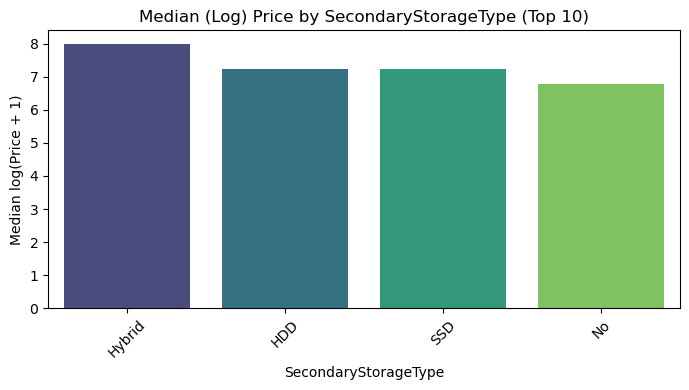

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


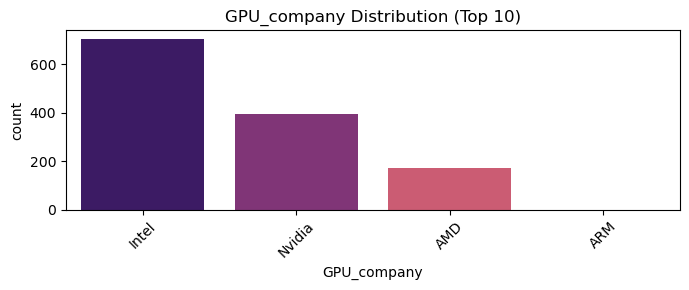

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


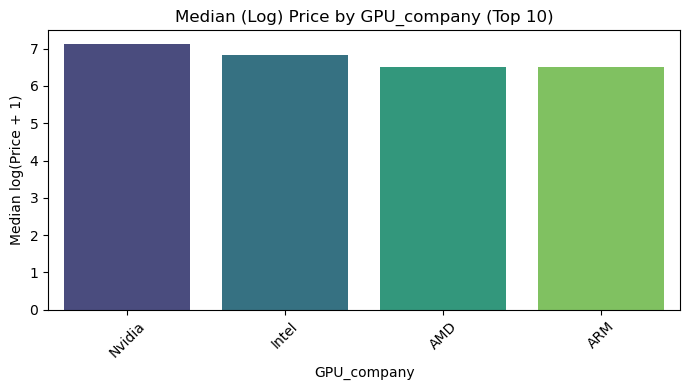

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, order=order, palette="magma")


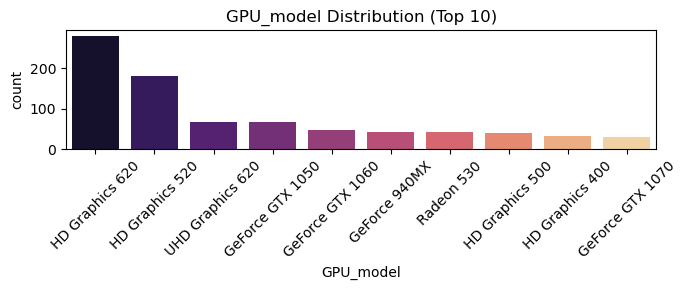

/var/folders/0h/v2ksz4wn24b34zzbtv41dsb00000gn/T/ipykernel_72733/2383676205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette="viridis")


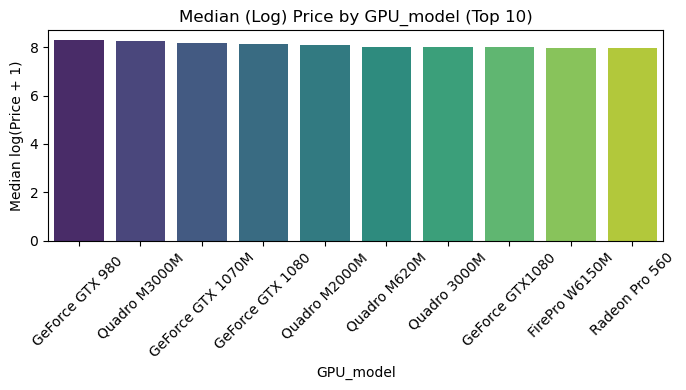

In [23]:
# Function to plot category distribution and relation with price
for c in cat_cols:
    plt.figure(figsize=(7,3))
    order = df[c].value_counts().index[:10]  # top 10 categories only
    
    # Count distribution
    sns.countplot(data=df, x=c, order=order, palette="magma")
    plt.title(f"{c} Distribution (Top 10)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Median price (log scale to reduce outlier influence)
    plt.figure(figsize=(7,4))
    medians = df.groupby(c)['Price_log'].median().sort_values(ascending=False)[:10]
    sns.barplot(x=medians.index, y=medians.values, palette="viridis")
    plt.title(f"Median (Log) Price by {c} (Top 10)")
    plt.ylabel("Median log(Price + 1)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

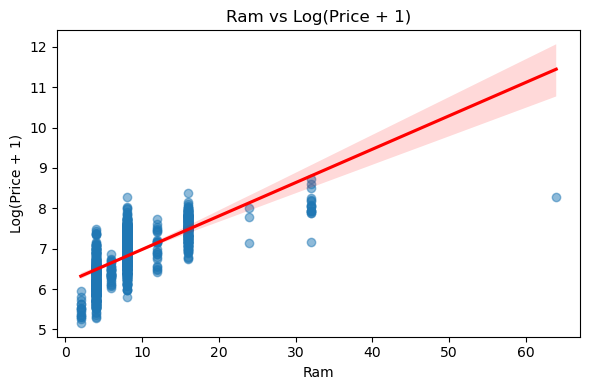

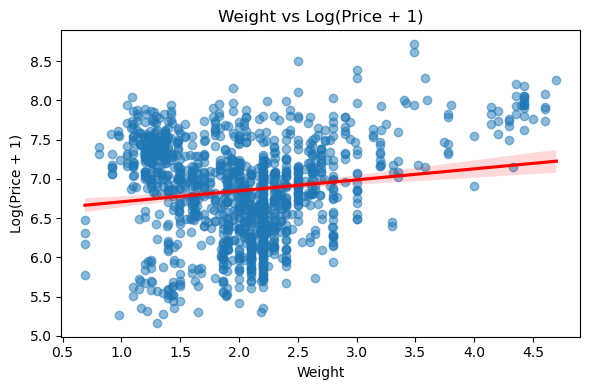

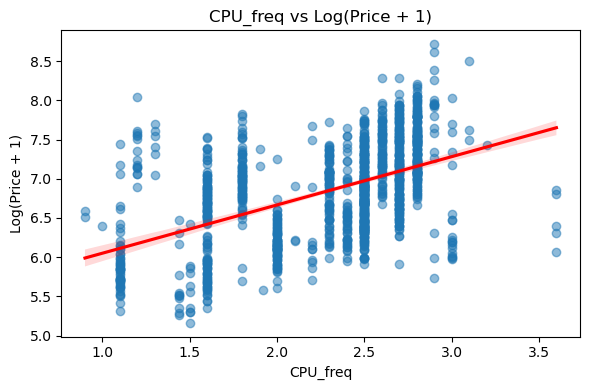

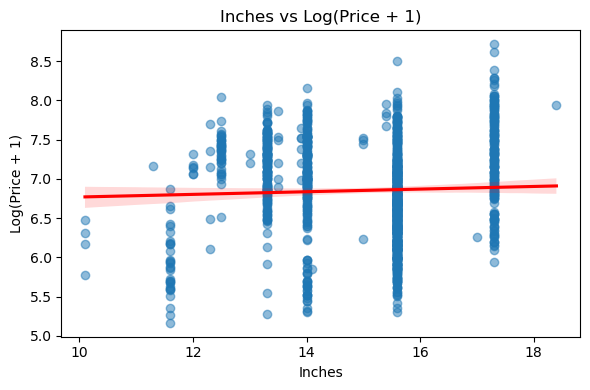

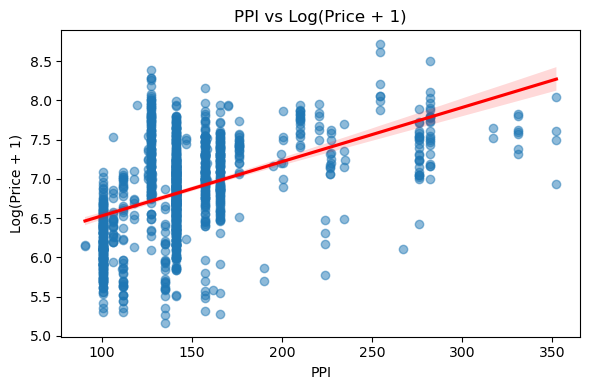

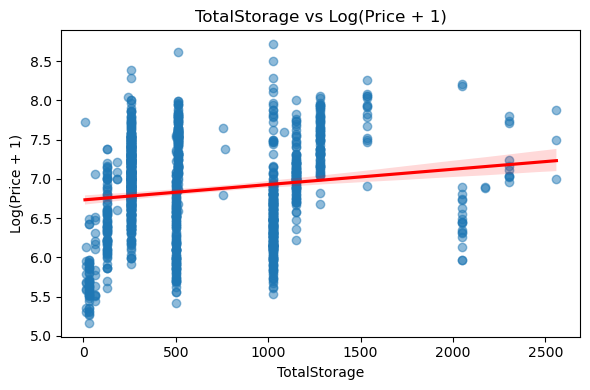

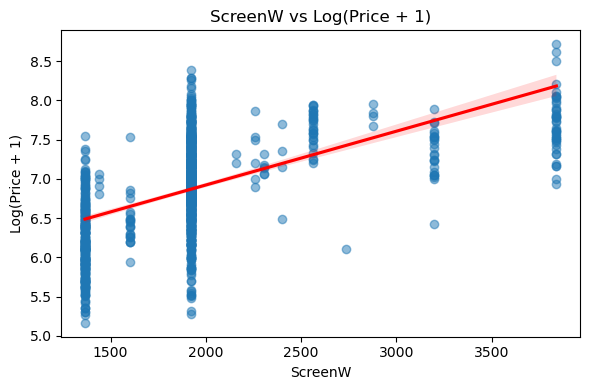

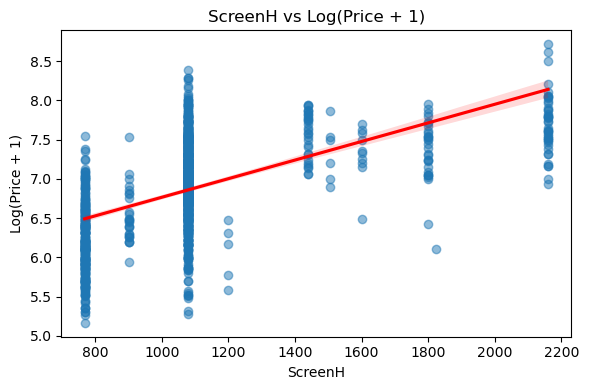

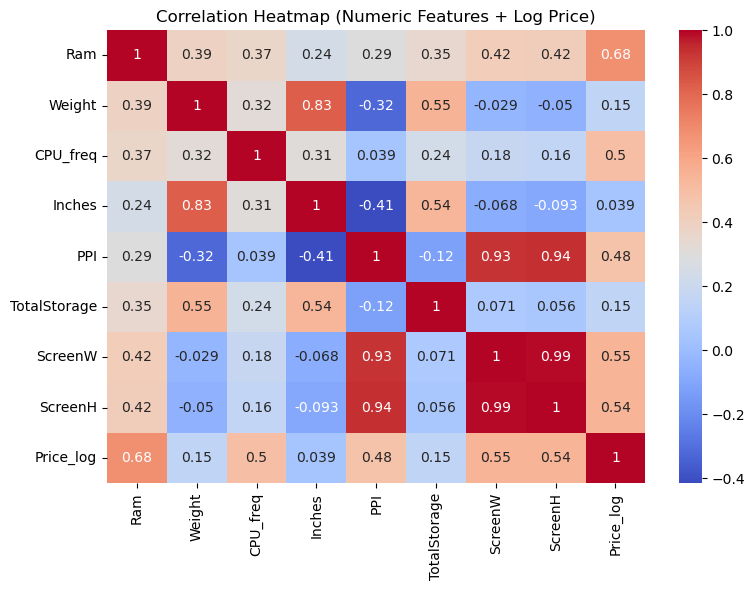

In [24]:
# List of important numeric columns to analyze
num_features = ['Ram', 'Weight', 'CPU_freq', 'Inches', 
                'PPI', 'TotalStorage', 'ScreenW', 'ScreenH']

# Use log-transformed price for stable visualization
target = 'Price_log'

for col in num_features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        
        # Scatter + regression line
        sns.regplot(x=df[col], y=df[target], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        plt.title(f"{col} vs Log(Price + 1)")
        plt.xlabel(col)
        plt.ylabel("Log(Price + 1)")
        plt.tight_layout()
        plt.show()

# Optional: Correlation heatmap (numeric only)
plt.figure(figsize=(8,6))
corr = df[num_features + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features + Log Price)")
plt.tight_layout()
plt.show()

Now we will check for multicollinearity, since too much correaltion causes redundancy and will harm model performance.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
## Select Numerical columns for VIF checj
numeric_cols=['Ram', 'CPU_freq', 'PPI', 'TotalStorage', 'Weight', 'Inches', 'ScreenW', 'ScreenH']
X_vif = df[numeric_cols].dropna()

In [27]:
## calculate the VIF
vif=pd.DataFrame()
vif['Features']=X_vif.columns
vif['VIF']=[variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

In [28]:
vif = vif.sort_values(by='VIF', ascending=False)
print("\nVariance Inflation Factor (VIF):")
print(vif)


Variance Inflation Factor (VIF):
       Features          VIF
7       ScreenH  1490.130715
6       ScreenW  1427.037571
2           PPI   225.953254
5        Inches    64.912979
4        Weight    37.264125
1      CPU_freq    26.851600
0           Ram     6.285428
3  TotalStorage     4.040808


OMG, so there are some features with very high correaltion that needs to be dropped. We will drop ScreenW, ScreenH and Inches since only ppi is enough to describe these physical properties,

In [29]:
df = df.drop(columns=['ScreenW', 'ScreenH', 'Inches'])

In [30]:
## Recheck the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df[['Ram', 'CPU_freq', 'PPI', 'TotalStorage', 'Weight']].dropna()

vif = pd.DataFrame()
vif['Feature'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif.sort_values('VIF', ascending=False))

        Feature        VIF
1      CPU_freq  19.215936
4        Weight  14.075388
2           PPI   9.494280
0           Ram   5.331911
3  TotalStorage   3.903641


Wow, our VIF decreased a lot, since now our features are clean and non-redundant, our next step would be train/test split.

In [31]:
target='Price_log'
numeric_features = ['Ram', 'CPU_freq', 'PPI', 'TotalStorage', 'Weight']


In [32]:
categorical_features = [
    'Company', 'Product', 'TypeName', 'OS', 'PrimaryStorageType', 
    'SecondaryStorageType', 'GPU_company', 'GPU_model', 
    'CPU_company', 'Touchscreen', 'IPSpanel', 'RetinaDisplay'
]

In [33]:
X=df[numeric_features+categorical_features]
y=df[target]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(1020, 17)

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [37]:
high_cardinality=['Product', 'GPU_model']
low_cardinality=[c for c in categorical_features if c not in high_cardinality]

In [38]:
## frequency encode high card features
for col in high_cardinality:
    freq=X_train[col].value_counts(normalize=True)
    X_train[col+'_freq']=X_train[col].map(freq)
    X_test[col + '_freq'] = X_test[col].map(freq).fillna(0)

In [39]:
## Drop original high card columns
X_train.drop(columns=high_cardinality, inplace=True)
X_test.drop(columns=high_cardinality, inplace=True)

In [40]:
## Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features + [col + '_freq' for col in high_cardinality]),
    ('cat', categorical_transformer, low_cardinality)
])

## Model Training

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


1. Linear Regression Model

In [42]:
lin_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lin_pipeline.fit(X_train, y_train)

y_pred_lin = lin_pipeline.predict(X_test)

print("Linear Regression Results:")
print("R² Score:", round(r2_score(y_test, y_pred_lin), 3))
rmse = root_mean_squared_error(y_test, y_pred_lin)
print("RMSE:", round(rmse, 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred_lin), 3))


Linear Regression Results:
R² Score: 0.802
RMSE: 0.26
MAE: 0.213


2. Random Forest 

In [43]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest Results:")
print("R² Score:", round(r2_score(y_test, y_pred_rf), 3))
print("RMSE:", round(root_mean_squared_error(y_test, y_pred_rf), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred_rf), 3))

Random Forest Results:
R² Score: 0.885
RMSE: 0.198
MAE: 0.155


Lets compare noth the models side by side

In [44]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_score(y_test, y_pred_lin), r2_score(y_test, y_pred_rf)],
    'RMSE': [root_mean_squared_error(y_test, y_pred_lin),
             root_mean_squared_error(y_test, y_pred_rf)],
    'MAE': [mean_absolute_error(y_test, y_pred_lin),
            mean_absolute_error(y_test, y_pred_rf)]
}).round(3)

print("Model Comparison:")
print(comparison)

Model Comparison:
               Model  R2 Score   RMSE    MAE
0  Linear Regression     0.802  0.260  0.213
1      Random Forest     0.885  0.198  0.155


So we can see our random forest outperforms Linear regression across all metrics. 

## Random Forest HyperParameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Define pipeline with preprocessing and model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [59]:
param_grid = {
    'model__n_estimators': [200, 300, 400],
    'model__max_depth': [15, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt']
}

In [60]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='r2',         # optimize R² score
    n_jobs=-1,            # use all CPU cores
    verbose=2
)

In [61]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model__max_depth=15, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.2s
[CV] END model__max_depth=15, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.2s
[CV] END model__max_depth=15, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.2s
[CV] END model__max_depth=15, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.2s
[CV] END model__max_depth=15, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.2s
[CV] END model__max_depth=15, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=   0.3s
[CV] END

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Ram',
                                                                          'CPU_freq',
                                                                          'PPI',
                                                                          'TotalStorage',
                                                                          'Weight',
                                                                          'Product_freq',
                                                                          'GPU_model_freq']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Company',
                                                                          'TypeName',
                                                                          'OS',
                                                                          '...
                                                                          'SecondaryStorageType',
                                                                          'GPU_company',
                                                                          'CPU_company',
                                                                          'Touchscreen',
                                                                          'IPSpanel',
                                                                          'RetinaDisplay'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [15, 20],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [200, 300, 400]},
             scoring='r2', verbose=2)

In [62]:
## best parameters 
print(grid_search.best_params_)

{'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 400}


In [63]:
# Best estimator
best_model = grid_search.best_estimator_


In [64]:
# Evaluate on test set
y_pred_best = best_model.predict(X_test)


In [65]:
print("Tuned Random Forest Results:")
print("R² Score:", round(r2_score(y_test, y_pred_best), 3))
print("RMSE:", round(root_mean_squared_error(y_test, y_pred_best), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred_best), 3))

Tuned Random Forest Results:
R² Score: 0.888
RMSE: 0.196
MAE: 0.154


## Save and Load Model using Pickle

In [66]:
import pickle

In [67]:
with open("best_rf_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Model successfully saved as 'best_rf_model.pkl'")

Model successfully saved as 'best_rf_model.pkl'


In [68]:
with open("best_rf_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully from pickle file.")


Model loaded successfully from pickle file.


In [69]:
y_pred_loaded = loaded_model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

print("Loaded Model Performance:")
print("R² Score:", round(r2_score(y_test, y_pred_loaded), 3))
print("RMSE:", round(root_mean_squared_error(y_test, y_pred_loaded), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred_loaded), 3))

Loaded Model Performance:
R² Score: 0.888
RMSE: 0.196
MAE: 0.154


Exception ignored in: <function ResourceTracker.__del__ at 0x104f0dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106969bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1037e9bc0>
Traceback (most recent call last

In [ ]:
import pickle

with open("best_rf_model.pkl", "rb") as file:
    model = pickle.load(file)

print("Loaded object type:", type(model))

Loaded object type: <class 'sklearn.pipeline.Pipeline'>


Exception ignored in: <function ResourceTracker.__del__ at 0x108165bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x110065bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x110165bc0>
Traceback (most recent call last